# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

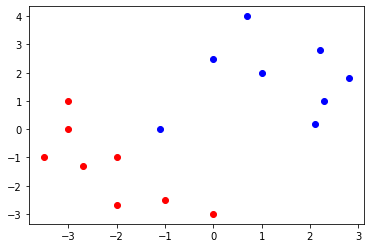

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to mpltimize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

In [4]:
# Write your code here
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m)
b = cp.Variable()   #Gamma Term
C = 0.01

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W)))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, (X @ W + b))-1 >= 0]
# constraints = [cp.matmul(y, (cp.matmul(X, W.T) + b))-1 >= 0]

x_constraints = [cp.matmul(W.T , X[i]) + b - 1 >= 0  for i in range(0,8)]
y_constraints = [cp.matmul(W.T , X[i]) + b + 1 <= 0 for i in range(8,16)]

constraints = x_constraints +  y_constraints  

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

optimal value of W [-1.73913043 -1.30434783]
optimal value of b -2.9130434780347696
Optimization optimal


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

No handles with labels found to put in legend.


delta= 0.919999999998595


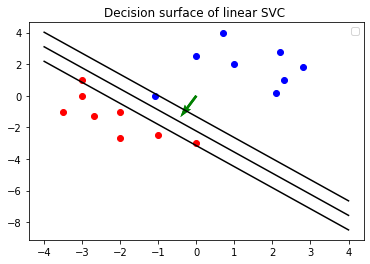

In [5]:
# Write your code here
import math
def plotSVM():

    def plot_separator(ax, w1, w2, b): 
        slope = -w1 / w2
        intercept = b
        # print(slope, intercept)
        x = np.arange(-4, 5)
        ax.plot(x, x * slope + intercept, 'k-')

    def plot_Wvector(ax, w1, w2): 
        V = np.array([[-1,-w2/w1]])
        origin = np.array([[0, 0],[0, 0]]) # origin point

        plt.quiver(*origin, V[:,0], V[:,1], color=['g'], scale=21)

    # title for the plots
    title = ('Decision surface of linear SVC ')
    delta=  2/ math.sqrt((W[0].value)**2 +  (W[1].value)**2)
    print("delta=", delta)
    plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value)
    plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value-delta)
    plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value+delta)
    plot_Wvector(plt,  W[1].value, W[0].value )
    plot_points(X, y)
    plt.title(title)
    plt.legend()
    plt.show()


plotSVM()

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

No handles with labels found to put in legend.


[[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]
[ 1  1 -1]


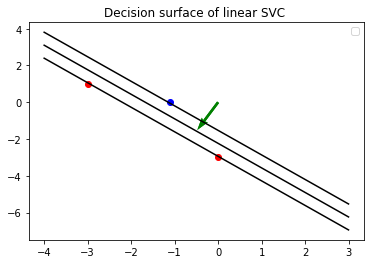

In [6]:
# Write your code here
# find points lying on b - delta and b + delta

X2 = np.empty((0,2), 'float')
Y2 = np.empty((0,1), 'int')
delta=  2/ math.sqrt((W[0].value)**2 +  (W[1].value)**2)
for i in range(len(X)):
    y1 = W[0].value* X[i][0] + W[1].value * X[i][1] + b.value - delta
    y2 = W[0].value* X[i][0] + W[1].value * X[i][1] + b.value + delta
    # print(y1, y2)
    if (y1 <= 0.1 and y1> 0) or (y2 >= -0.1 and y2<0):
        if X2.size >0:
            X2 = np.append(X2,np.array([[X[i][0], X[i][1]]]), axis = 0)
            Y2 = np.append(Y2, np.array([y[i]]), axis = 0)
        else:
            X2 = np.array([[X[i][0], X[i][1]]])
            Y2 = np.array([y[i]])
print(X2)
print(Y2)
import math
def plot_separator(ax, w1, w2, b): 
    slope = -w1 / w2
    intercept = -b / w2
    # print(slope, intercept)
    x = np.arange(-4, 4)
    ax.plot(x, x * slope + intercept, 'k-')

def plot_Wvector(ax, w1, w2): 
    V = np.array([[w1,w2]])
    origin = np.array([[0, 0],[0, 0]]) # origin point

    plt.quiver(*origin, V[:,0], V[:,1], color=['g'], scale=21)
    # plt.show()

# title for the plots
title = ('Decision surface of linear SVC ')
delta=  2/ math.sqrt((W[0].value)**2 +  (W[1].value)**2)
# print(delta)
plot_separator(plt, W[0].value, W[1].value, b.value)
plot_separator(plt, W[0].value, W[1].value, b.value-delta)
plot_separator(plt, W[0].value, W[1].value, b.value+delta)
plot_Wvector(plt,  W[1].value, W[0].value )
plot_points(X2, Y2)
plt.title(title)
plt.legend()
plt.show()


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

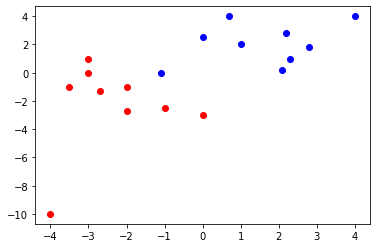

In [7]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], [-1, -2.5], [0, -3], [-4, -10],
                [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8],[4,4] ])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()


No handles with labels found to put in legend.


optimal value of W [-1.73913043 -1.30434783]
optimal value of b -2.9130434782913306
Optimization optimal
delta= 0.9199999998414871


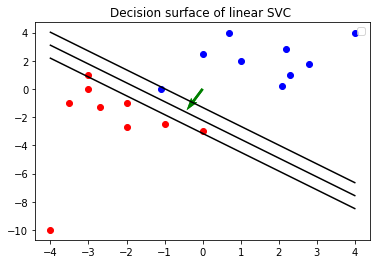

In [8]:
# Solve for the decision boundary using this modified dataset
# Write your code here
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m)
b = cp.Variable()   #Gamma Term
C = 0.01

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W)))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, (X @ W + b))-1 >= 0]
# constraints = [cp.matmul(y, (cp.matmul(X, W.T) + b))-1 >= 0]

x_constraints = [cp.matmul(W.T , X[i]) + b - 1 >= 0  for i in range(0,9)]
y_constraints = [cp.matmul(W.T , X[i]) + b + 1 <= 0 for i in range(9,18)]

constraints = x_constraints +  y_constraints  

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

plotSVM()

### Answer

The decision boundary is not changed as the 2 points added do not affect the support vectors. The decision boundary is affected only by support vectors. The data is still linearly separable. For point (-4, -10) with label 1, the value of y.(W.T * X + b) >=1 and for point (4, 4) with label -1 also, the value of y.(W.T * X + b) >=1.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

No handles with labels found to put in legend.


optimal value of W [-0.06623994 -0.04967996]
optimal value of b -0.11095190423960331
Optimization optimal
Dual value Constraint_0 [1.25108747e-13 1.25108747e-13 1.25108747e-13 1.25108747e-13
 1.25108747e-13 1.25108747e-13 1.25108747e-13 1.25108747e-13
 1.25108747e-13 1.25108747e-13 1.25108747e-13 1.25108747e-13
 1.25108747e-13 1.25108747e-13 1.25108747e-13 1.25108747e-13
 1.25108747e-13 1.25108747e-13]
Dual value Constraint_1 [2.90918163e-13 2.90918163e-13 2.90918163e-13 2.90918163e-13
 2.90918163e-13 2.90918163e-13 2.90918163e-13 2.90918163e-13
 2.90918163e-13 2.90918163e-13 2.90918163e-13 2.90918163e-13
 2.90918163e-13 2.90918163e-13 2.90918163e-13 2.90918163e-13
 2.90918163e-13 2.90918163e-13]
delta= 24.154610218367758


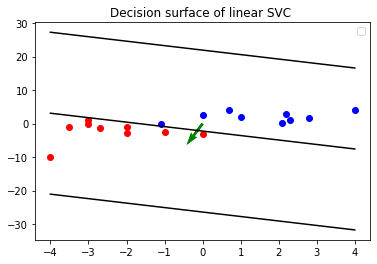

In [9]:
# Write your code here for C= 0.01
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 0.01

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X[i]) + b + Psi - 1 >= 0) for i in range(0,9)]
y_constraints = [(cp.matmul(W.T , X[i]) + b - Psi + 1 <= 0)  for i in range(9,18)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

plotSVM()

No handles with labels found to put in legend.


optimal value of W [-0.66240008 -0.49680006]
optimal value of b -1.1095201396156642
Optimization optimal
Dual value Constraint_0 [4.23735073e-13 4.23735073e-13 4.23735073e-13 4.23735073e-13
 4.23735073e-13 4.23735073e-13 4.23735073e-13 4.23735073e-13
 4.23735073e-13 4.23735073e-13 4.23735073e-13 4.23735073e-13
 4.23735073e-13 4.23735073e-13 4.23735073e-13 4.23735073e-13
 4.23735073e-13 4.23735073e-13]
Dual value Constraint_1 [1.09089449e-12 1.09089449e-12 1.09089449e-12 1.09089449e-12
 1.09089449e-12 1.09089449e-12 1.09089449e-12 1.09089449e-12
 1.09089449e-12 1.09089449e-12 1.09089449e-12 1.09089449e-12
 1.09089449e-12 1.09089449e-12 1.09089449e-12 1.09089449e-12
 1.09089449e-12 1.09089449e-12]
delta= 2.4154586332407924


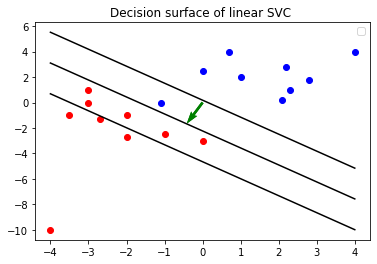

In [10]:
# Write your code here for C= 0.1
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 0.1

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X[i]) + b + Psi - 1 >= 0) for i in range(0,9)]
y_constraints = [(cp.matmul(W.T , X[i]) + b - Psi + 1 <= 0)  for i in range(9,18)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

plotSVM()

No handles with labels found to put in legend.


optimal value of W [-1.73913044 -1.30434783]
optimal value of b -2.9130434791730697
Optimization optimal
Dual value Constraint_0 [1.07670986e-11 1.07670986e-11 1.07670986e-11 1.07670986e-11
 1.07670986e-11 1.07670986e-11 1.07670986e-11 1.07670986e-11
 1.07670986e-11 1.07670986e-11 1.07670986e-11 1.07670986e-11
 1.07670986e-11 1.07670986e-11 1.07670986e-11 1.07670986e-11
 1.07670986e-11 1.07670986e-11]
Dual value Constraint_1 [2.71982678e-11 2.71982678e-11 2.71982678e-11 2.71982678e-11
 2.71982678e-11 2.71982678e-11 2.71982678e-11 2.71982678e-11
 2.71982678e-11 2.71982678e-11 2.71982678e-11 2.71982678e-11
 2.71982678e-11 2.71982678e-11 2.71982678e-11 2.71982678e-11
 2.71982678e-11 2.71982678e-11]
delta= 0.9199999996671632


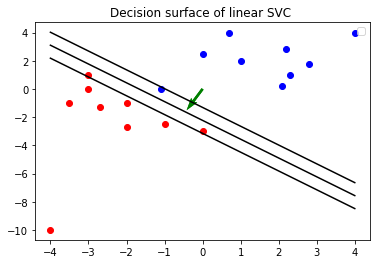

In [11]:
# Write your code here for C= 3
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 3

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X[i]) + b + Psi - 1 >= 0) for i in range(0,9)]
y_constraints = [(cp.matmul(W.T , X[i]) + b - Psi + 1 <= 0)  for i in range(9,18)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

plotSVM()

No handles with labels found to put in legend.


optimal value of W [-1.73913044 -1.30434783]
optimal value of b -2.9130434798905727
Optimization optimal
Dual value Constraint_0 [2.18529558e-11 2.18529558e-11 2.18529558e-11 2.18529558e-11
 2.18529558e-11 2.18529558e-11 2.18529558e-11 2.18529558e-11
 2.18529558e-11 2.18529558e-11 2.18529558e-11 2.18529558e-11
 2.18529558e-11 2.18529558e-11 2.18529558e-11 2.18529558e-11
 2.18529558e-11 2.18529558e-11]
Dual value Constraint_1 [5.58502325e-11 5.58502325e-11 5.58502325e-11 5.58502325e-11
 5.58502325e-11 5.58502325e-11 5.58502325e-11 5.58502325e-11
 5.58502325e-11 5.58502325e-11 5.58502325e-11 5.58502325e-11
 5.58502325e-11 5.58502325e-11 5.58502325e-11 5.58502325e-11
 5.58502325e-11 5.58502325e-11]
delta= 0.9199999994738003


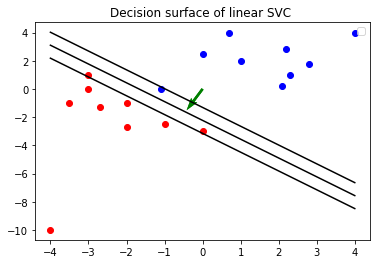

In [12]:
# Write your code here for C= 10
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 10

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X[i]) + b + Psi - 1 >= 0) for i in range(0,9)]
y_constraints = [(cp.matmul(W.T , X[i]) + b - Psi + 1 <= 0)  for i in range(9,18)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

plotSVM()

No handles with labels found to put in legend.


optimal value of W [-1.73913043 -1.30434783]
optimal value of b -2.9130434783871024
Optimization optimal
Dual value Constraint_0 [2.09112282e-12 2.09112282e-12 2.09112282e-12 2.09112282e-12
 2.09112282e-12 2.09112282e-12 2.09112282e-12 2.09112282e-12
 2.09112282e-12 2.09112282e-12 2.09112282e-12 2.09112282e-12
 2.09112282e-12 2.09112282e-12 2.09112282e-12 2.09112282e-12
 2.09112282e-12 2.09112282e-12]
Dual value Constraint_1 [5.51574291e-12 5.51574291e-12 5.51574291e-12 5.51574291e-12
 5.51574291e-12 5.51574291e-12 5.51574291e-12 5.51574291e-12
 5.51574291e-12 5.51574291e-12 5.51574291e-12 5.51574291e-12
 5.51574291e-12 5.51574291e-12 5.51574291e-12 5.51574291e-12
 5.51574291e-12 5.51574291e-12]
delta= 0.9199999999560702


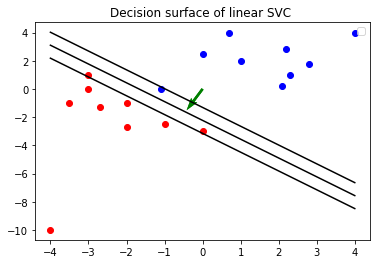

In [13]:
# Write your code here for C= 100
m, n = np.shape(X)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 100

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X[i]) + b + Psi - 1 >= 0) for i in range(0,9)]
y_constraints = [(cp.matmul(W.T , X[i]) + b - Psi + 1 <= 0)  for i in range(9,18)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

plotSVM()

**Answer** :
With increasing values of C, the error permitted decreases and hence the margin reduces and hyperplanes come close to the decision boundary. At C=3 the margin is minimum, and the margin doesn't change on further increase in value of C. 

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

No handles with labels found to put in legend.


7 15
optimal value of W [-0.38493724 -0.35146444]
optimal value of b -0.12133891237372571
Optimization optimal
Dual value Constraint_0 [8.13595019e-12 8.13595019e-12 8.13595019e-12 8.13595019e-12
 8.13595019e-12 8.13595019e-12 8.13595019e-12 8.13595019e-12
 8.13595019e-12 8.13595019e-12 8.13595019e-12 8.13595019e-12
 8.13595019e-12 8.13595019e-12 8.13595019e-12]
Dual value Constraint_1 [1.62631119e-10 1.62631119e-10 1.62631119e-10 1.62631119e-10
 1.62631119e-10 1.62631119e-10 1.62631119e-10 1.62631119e-10
 1.62631119e-10 1.62631119e-10 1.62631119e-10 1.62631119e-10
 1.62631119e-10 1.62631119e-10 1.62631119e-10]


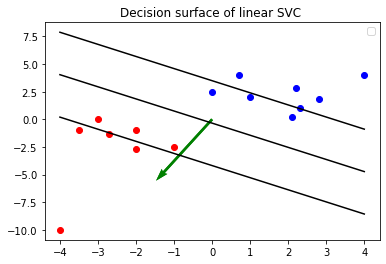

In [14]:
# Write your Code here

# find points lying on b - delta and b + delta
# Add the remaining points to another vector array

X2 = np.empty((0,2), 'float')
Y2 = np.empty((0,1), 'int')
delta=  2/ math.sqrt((W[0].value)**2 +  (W[1].value)**2)
for i in range(len(X)):
    y1 = W[0].value* X[i][0] + W[1].value * X[i][1] + b.value - delta
    y2 = W[0].value* X[i][0] + W[1].value * X[i][1] + b.value + delta
    # print(y1, y2)
    if (y1 <= 0.1 and y1> 0) or (y2 >= -0.1 and y2<0):
        pass
    else:
        if X2.size >0:
            X2 = np.append(X2,np.array([[X[i][0], X[i][1]]]), axis = 0)
            Y2 = np.append(Y2, np.array([y[i]]), axis = 0)
        else:
            X2 = np.array([[X[i][0], X[i][1]]])
            Y2 = np.array([y[i]])
# print(X2)
# print(Y2)
# print(len(Y2))
# identify the split between Y2 =1 and Y2 = -1
for j in range(len(Y2)):
    if Y2[j] == -1:
        Ysep =j
        break

m, n = np.shape(X2)
print(Ysep, m)

W= cp.Variable(n)
Psi = cp.Variable(m, nonneg=True)
b = cp.Variable()   #Gamma Term
C = 100

#Objective function is 0.5 ||W||_2^2
objective = cp.Minimize(0.5*cp.square(cp.norm(W))+ C*cp.sum(Psi))
# Constraint Y(W X+b) >= 1
# constraints = [cp.matmul(y, X @ W + b)-1 + Psi >= 0 , Psi>=0]

x_constraints = [(cp.matmul(W.T , X2[i]) + b + Psi - 1 >= 0) for i in range(0,Ysep)]
y_constraints = [(cp.matmul(W.T , X2[i]) + b - Psi + 1 <= 0)  for i in range(Ysep,m)]
constraints = x_constraints +  y_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("optimal value of W", W.value)
print("optimal value of b", b.value)
print("Optimization", prob.status)

print("Dual value Constraint_0", constraints[0].dual_value)
print("Dual value Constraint_1", constraints[1].dual_value)

import math
def plot_separator(ax, w1, w2, b): 
    slope = -w1 / w2
    intercept = b
    # print(slope, intercept)
    x = np.arange(-4, 5)
    ax.plot(x, x * slope + intercept, 'k-')

def plot_Wvector(ax, w1, w2): 
    V = np.array([[w1*10,w2*10]])
    origin = np.array([[0, 0],[0, 0]]) # origin point

    plt.quiver(*origin, V[:,0], V[:,1], color=['g'], scale=21)
    # plt.show()

# title for the plots
title = ('Decision surface of linear SVC ')
delta=  2/ math.sqrt((W[0].value)**2 +  (W[1].value)**2)
# print(delta)
plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value)
plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value-delta)
plot_separator(plt, W[0].value, W[1].value, -b.value/W[1].value+delta)
plot_Wvector(plt,  W[1].value, W[0].value )
plot_points(X2, Y2)
plt.title(title)
plt.legend()
plt.show()


**Answer** : Yes, the decision boundary changes. The decision boundary is only dependent on the support vectors which have been removed in this case. New support vectors would be calculated in this scenario. 

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-11-25 13:47:12--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  3.62MB/s    in 2.6s    

2021-11-25 13:47:15 (3.62 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-11-25 13:47:16--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labe

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
from sklearn.svm import LinearSVC # "Support vector classifier"
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
def measure():

  acc = clf.score(images_train,labels_train)
  y_pred = clf.predict(images_test)
  accuracy = accuracy_score(labels_test, y_pred)
  conf_mat = confusion_matrix(labels_test,y_pred)
  f1 = f1_score(labels_test, y_pred, average='weighted')

  print('\nSVM Trained Classifier Accuracy: ',acc)
  print('\nPredicted Values: ',y_pred)
  print('\nAccuracy of Classifier on Validation Images: ',accuracy)
  print('\n F1 Score : ',f1)
  print('\nConfusion Matrix: \n',conf_mat)
  # Plot Confusion Matrix for Test Data
  plt.matshow(conf_mat)
  plt.title('Confusion Matrix for Test Data')
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



SVM Trained Classifier Accuracy:  0.8902

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.8804

 F1 Score :  0.8814899314720638

Confusion Matrix: 
 [[ 923    0    2    2    1    5   16    4   24    3]
 [   0 1076    4    3    0    2    3    1   45    1]
 [   3   13  829   43    8    2    8   11  108    7]
 [   0    1   17  907    2   16    4   18   38    7]
 [   2    1   15    7  818    4    3    6   17  109]
 [   7    1    7   54   10  698   21   13   67   14]
 [   7    3   17    3    5   18  893    0    9    3]
 [   1    3   23    5    6    2    1  908   17   62]
 [   6   12   11   35    8   34    9   11  834   14]
 [   4    6    5   11   17   10    0   14   24  918]]


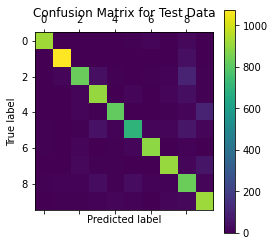

In [ ]:
clf = LinearSVC(C =1, loss = "squared_hinge", multi_class = "ovr", penalty = "l2")
clf.fit(images_train, labels_train)
measure()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



SVM Trained Classifier Accuracy:  0.8800166666666667

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.874

 F1 Score :  0.8733651266600789

Confusion Matrix: 
 [[ 922    0    1    4    3    8   16    3   22    1]
 [   0 1094    2    7    0    0    6    1   24    1]
 [   6    9  709   68   27    2   26   24  155    6]
 [   3    0    6  921    6    8    2   16   41    7]
 [   2    1    1    2  919    0    8    5   14   30]
 [  12    1    0  118   25  627   21   13   63   12]
 [   5    4    2    2   16   10  905    0   14    0]
 [   3    5   14    1   12    0    0  961   11   21]
 [   3    7    2   32   27   13    9   13  857   11]
 [  10    1    0   14   56    2    0   73   28  825]]


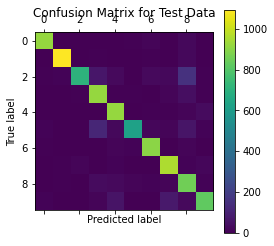

In [ ]:
clf = LinearSVC(C =10, loss = "squared_hinge", multi_class = "ovr", penalty = "l2")
clf.fit(images_train, labels_train)
measure()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



SVM Trained Classifier Accuracy:  0.88875

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.8843

 F1 Score :  0.8835477760412096

Confusion Matrix: 
 [[ 941    0    1    2    1    5    9    9   12    0]
 [   0 1109    7    5    1    1    4    1    7    0]
 [  13    7  880   18   11    5   31   25   40    2]
 [   4    0   18  928    1   16    6   11   21    5]
 [   1    1    3    9  883    2   14   13   20   36]
 [   9    1    3   95    8  651   51    8   57    9]
 [   9    3    7    0    5   11  919    1    3    0]
 [   0    5   16   10    5    3    0  953    9   27]
 [   9   13   12   51    9   70   29   15  759    7]
 [   6    6    0   37   26   11    0   58   45  820]]


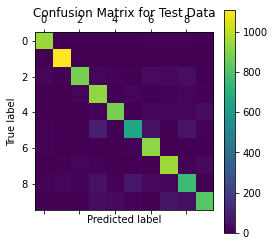

In [ ]:
clf = LinearSVC(C =100, loss = "squared_hinge", multi_class = "ovr", penalty = "l2")
clf.fit(images_train, labels_train)
measure()

The gamma parameter defines how far a single training example influences, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

sklearn provides for two values of gamma{‘scale’, ‘auto’} 
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.

Interesting for the current dataset gamma = 'auto' gives poor results (for sigmoid and rbf). From the documentation of scikit-learn, 'auto' is probably leading to a high value of Gamma and hence accuracy is falling steeply.

Reference for the image below - https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

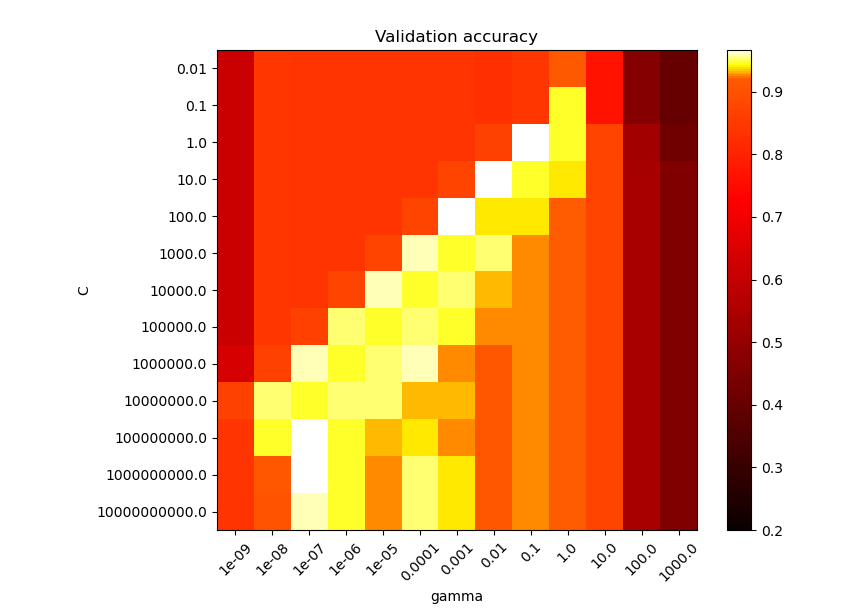


SVM Trained Classifier Accuracy:  0.9899166666666667

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9792

 F1 Score :  0.9791856837674859

Confusion Matrix: 
 [[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


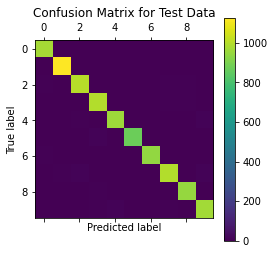

In [ ]:
clf = SVC(C =1, kernel="rbf", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.9999

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9837

 F1 Score :  0.9836954484859449

Confusion Matrix: 
 [[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  996    0    2    0    3    4    3]
 [   0    0    4    0  966    0    2    0    0   10]
 [   2    0    0    8    1  873    3    0    3    2]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    2    1    0    0 1007    0    6]
 [   3    0    2    4    3    1    1    2  954    4]
 [   1    3    0    7    9    3    1    5    0  980]]


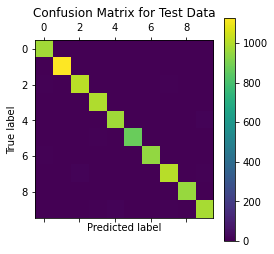

In [ ]:
clf = SVC(C =10, kernel="rbf", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9833

 F1 Score :  0.9832926228555976

Confusion Matrix: 
 [[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  995    0    2    0    4    4    3]
 [   0    0    4    0  967    0    2    0    0    9]
 [   2    0    0    9    1  872    3    0    3    2]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    5    9    2    1    0    0 1005    0    6]
 [   3    0    2    4    3    1    1    2  954    4]
 [   1    5    0    7    9    3    1    4    0  979]]


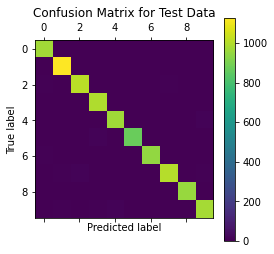

In [ ]:
clf = SVC(C =100, kernel="rbf", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023138302649304

Confusion Matrix: 
 [[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


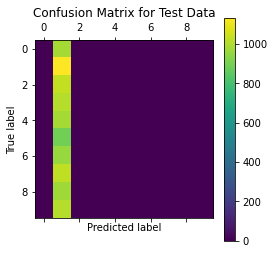

In [ ]:
clf = SVC(C =1, kernel="rbf", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023138302649304

Confusion Matrix: 
 [[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


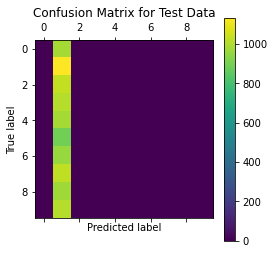

In [ ]:
clf = SVC(C =10, kernel="rbf", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023138302649304

Confusion Matrix: 
 [[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


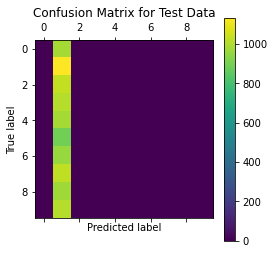

In [ ]:
clf = SVC(C =100, kernel="rbf", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.7699666666666667

Predicted Values:  [7 6 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.7759

 F1 Score :  0.7757962991809403

Confusion Matrix: 
 [[ 812    0   29    6    0   92   35    2    4    0]
 [   0 1073   13   15    0    3    4    1   26    0]
 [  29   44  779   25   20   15   46    6   60    8]
 [  29   10   38  725    2  120    6   14   42   24]
 [   5    5   11    1  830   11   19    4   18   78]
 [  48   24   12  107   14  591   20    6   59   11]
 [  17    5   75    2   31   35  784    0    9    0]
 [  25   15   38   11   17    6    0  850   13   53]
 [  24   40   31   32   30  128   11    9  624   45]
 [  18    6   16    8  121   31    0   73   45  691]]


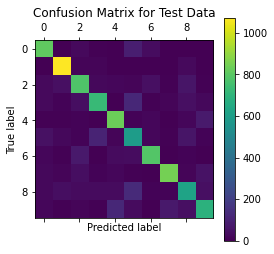

In [ ]:
clf = SVC(C =1, kernel="sigmoid", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.76145

Predicted Values:  [7 6 1 ... 9 5 6]

Accuracy of Classifier on Validation Images:  0.7672

 F1 Score :  0.7677832767885562

Confusion Matrix: 
 [[ 809    0   28    6    0   98   35    1    3    0]
 [   0 1057   18   18    0    5    5    1   31    0]
 [  34   50  755   31   20   18   48    7   63    6]
 [  32   11   32  738    3  133    6   11   36    8]
 [   5    7   20    2  809   17   17    6   10   89]
 [  55   25    8  110   18  584   21    5   60    6]
 [  19    4   77    2   39   37  773    0    7    0]
 [  25   15   43    9   15    8    0  825   12   76]
 [  27   38   28   44   37  138   11   11  611   29]
 [  17    9   18   10  110   39    1   68   26  711]]


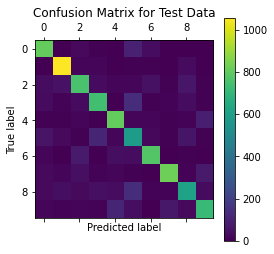

In [ ]:
clf = SVC(C =10, kernel="sigmoid", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.7585

Predicted Values:  [7 6 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.7637

 F1 Score :  0.7639178635665627

Confusion Matrix: 
 [[ 806    0   25    7    0  100   38    1    3    0]
 [   0 1059   18   16    0    5    5    0   32    0]
 [  29   51  759   29   18   18   48    7   65    8]
 [  32   12   33  734    3  133    6   10   38    9]
 [   6    6   18    2  819   19   16    6    9   81]
 [  55   24   10  110   16  584   22    4   61    6]
 [  17    4   77    2   41   36  774    0    7    0]
 [  25   12   44   13   15    9    0  824   12   74]
 [  29   49   22   52   31  139   12   15  603   22]
 [  18    9   20   12  134   36    1   74   30  675]]


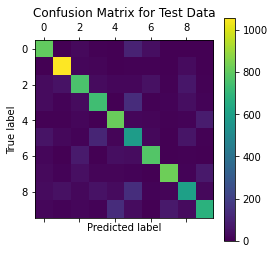

In [ ]:
clf = SVC(C =100, kernel="sigmoid", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.1123

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023146617554577305

Confusion Matrix: 
 [[   0  978    0    2    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  891    0    1    0    0    0    0    0    0]
 [   0  957    0    0    0    0    0    1    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


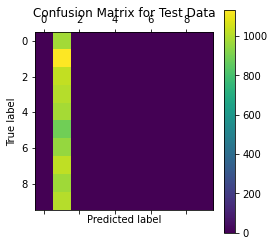

In [ ]:
clf = SVC(C =1, kernel="sigmoid", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.11216666666666666

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023150777248629704

Confusion Matrix: 
 [[   0  976    0    4    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  891    0    1    0    0    0    0    0    0]
 [   0  957    0    0    0    0    0    1    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


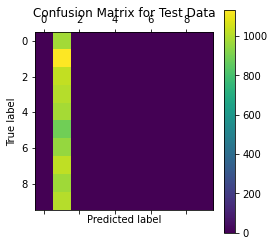

In [ ]:
clf = SVC(C =10, kernel="sigmoid", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.11213333333333333

Predicted Values:  [1 1 1 ... 1 1 1]

Accuracy of Classifier on Validation Images:  0.1135

 F1 Score :  0.023150777248629704

Confusion Matrix: 
 [[   0  976    0    4    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  891    0    1    0    0    0    0    0    0]
 [   0  957    0    0    0    0    0    1    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


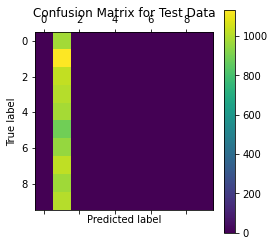

In [ ]:
clf = SVC(C =100, kernel="sigmoid", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.9916166666666667

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9771

 F1 Score :  0.9770823037557957

Confusion Matrix: 
 [[ 969    0    2    0    0    4    2    1    2    0]
 [   0 1127    2    1    0    0    3    0    2    0]
 [   6    2 1006    0    2    1    3    9    3    0]
 [   0    2    3  984    0    6    0    6    5    4]
 [   1    0    3    0  966    0    4    0    0    8]
 [   2    0    0    8    1  869    4    1    5    2]
 [   4    4    2    0    3    6  937    0    2    0]
 [   0   15    8    1    1    0    0  995    0    8]
 [   1    1    2    5    5    5    0    3  949    3]
 [   3    6    1    4   14    5    0    6    1  969]]


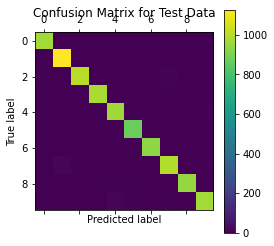

In [ ]:
clf = SVC(C =1, kernel="poly", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  0.9997

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9786

 F1 Score :  0.9785836892748415

Confusion Matrix: 
 [[ 972    0    1    2    0    2    1    0    2    0]
 [   0 1127    2    1    0    0    3    0    2    0]
 [   8    1 1006    0    2    0    4    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    0    0   10]
 [   2    0    0   11    1  866    4    1    4    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0    9    9    1    1    0    0 1002    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   2    5    1    5   10    4    1    4    3  974]]


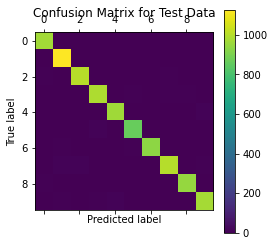

In [ ]:
clf = SVC(C =10, kernel="poly", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9787

 F1 Score :  0.978686114992579

Confusion Matrix: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


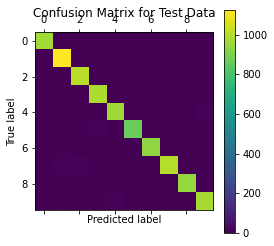

In [ ]:
clf = SVC(C =100, kernel="poly", gamma = "scale")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9787

 F1 Score :  0.978686114992579

Confusion Matrix: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


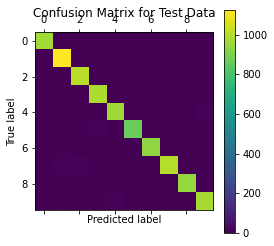

In [ ]:
clf = SVC(C =1, kernel="poly", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9787

 F1 Score :  0.978686114992579

Confusion Matrix: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


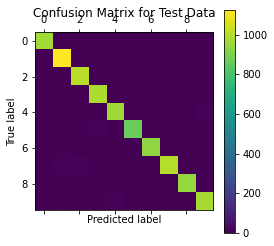

In [ ]:
clf = SVC(C =10, kernel="poly", gamma = "auto")
clf.fit(images_train, labels_train)
measure()


SVM Trained Classifier Accuracy:  1.0

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9787

 F1 Score :  0.978686114992579

Confusion Matrix: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


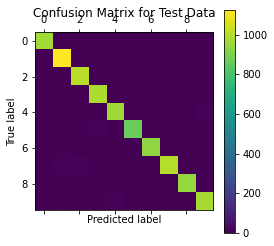

In [ ]:
clf = SVC(C =100, kernel="poly", gamma = "auto")
clf.fit(images_train, labels_train)
measure()

In [ ]:
# F1 Score is best for RBF, C= 10, Gamma = Scale
# Best F1 Score = 0.9836

# Method      C=1,Scale    C=10,Scale   C=100,Scale   C=1,auto   C=10,auto    C=100,auto
# Linear        0.8814        0.8733      0.8873 
# RBF           0.9791        0.9836      0.9832        0.0231      0.0231      0.0231
# Sigmoid       0.7757        0.7677      0.7639        0.0231      0.0231      0.0231
# Poly          0.9770        0.9785      0.9786        0.9786      0.9786      0.9786